As the launch of next generation gaming console around the corner, I think that it is nice to have an overview on the entire gaming market. I also want to have a deep analysis on how well the current generation consoles are doing, namely PS4 vs Xbox One.

This project is for gamers who are interested in gaming on the more popular platform and for developers who want to continue putting resources on current generation consoles. This analysis will offer insights on which platform has stronger player base and which platform sells more copies of games, as well as what kind of impact the current generation consoles could possibly have on the next generation consoles.

#### Part 1: Analysis of gaming market in general

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from wordcloud import WordCloud
import seaborn as sns
import networkx as nx

import pickle
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.utils import column_or_1d
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, Legend
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.models import CustomJS, Dropdown, Select
from bokeh.embed import components
from bokeh.io import export_png

In [197]:
df1=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/Hardware%20Yearly%20Sales.csv')

In [198]:
df1.head()

,Year,PS4,XOne,NS
0,2013,4430139,3075770,0
1,2014,14560282,7908581,0
2,2015,17510227,8631257,0
3,2016,17590843,8368621,0
4,2017,19808528,7644053,13116268


In [199]:
df2=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/Hardware%20Total%20Sales.csv')

In [200]:
df2.head()

,Year,PS4,XOne,NS
0,2013,4430139,3075770,0
1,2014,19045310,10984351,0
2,2015,36667145,19640765,0
3,2016,53490988,27924386,0
4,2017,73528627,34306680,13116268


In [201]:
df3=pd.read_csv('https://raw.githubusercontent.com/dxljack/Gaming-Market-Exploration/master/Dataset/vgsales-12-4-2019-short.csv')

In [202]:
df3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


Because we really only care about Global_Sales, I will replace missing value in Global_Sales with Total_Shipped. Next, I will also replace missing values in Critic_Score with User_Score.

In [203]:
df3["Global_Sales"] = df3["Global_Sales"].fillna(df3["Total_Shipped"])

In [204]:
df3["Critic_Score"] = df3["Critic_Score"].fillna(df3["User_Score"])

In [205]:
# fill in missing values in Global_Sales with mean value of each genre.
df3['Global_Sales'] = df3['Global_Sales'].fillna(df3.groupby('Genre')['Global_Sales'].transform('mean'))

In [206]:
# fill in missing values in Critic_Score with mean value of each genre.
df3['Critic_Score'] = df3['Critic_Score'].fillna(df3.groupby('Genre')['Critic_Score'].transform('mean'))

In [207]:
# round numerical values to 2 decimal places
df3 = df3.round(2)

In [208]:
df3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.70,NaN,82.86,82.86,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.00,NaN,40.24,40.24,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.20,9.1,37.14,37.14,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.28,NaN,36.60,36.60,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.00,8.8,33.09,33.09,NaN,NaN,NaN,NaN,2009.0


In [209]:
df3.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score         0
User_Score       55457
Total_Shipped    53965
Global_Sales         0
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [210]:
df3.describe()

,Rank,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,55792.000000,335.000000,1827.000000,55792.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.175042,8.253433,1.887258,0.484119,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,0.562451,1.401489,4.195693,0.953450,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.880000,7.800000,0.200000,0.250000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.280000,8.500000,0.590000,0.370000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,7.360000,9.100000,1.800000,0.550000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,10.000000,82.860000,82.860000,9.760000,9.850000,2.690000,3.120000,2020.000000


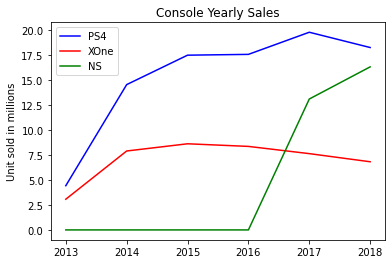

In [211]:
plt.plot(df1["Year"], df1["PS4"]/1000000, color='blue', label='PS4')
plt.plot(df1["Year"], df1["XOne"]/1000000, color='red', label='XOne')
plt.plot(df1["Year"], df1["NS"]/1000000, color='green', label='NS')
plt.ylabel("Unit sold in millions")
plt.title('Console Yearly Sales')
plt.xticks(df1['Year'])
plt.legend(loc='best')
plt.show()

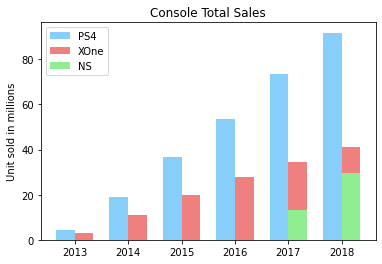

In [212]:
plt.bar(df2["Year"], df2["PS4"]/1000000, 0.35, label="PS4", color='lightskyblue')
plt.bar(df2["Year"]+0.35, df2["XOne"]/1000000, 0.35, label="XOne", color='lightcoral')
plt.bar(df2["Year"]+0.35, df2["NS"]/1000000, 0.35, label="NS", color='lightgreen')
plt.ylabel("Unit sold in millions")
plt.title('Console Total Sales')
plt.xticks(df2['Year']+0.35/2, ('2013','2014','2015','2016','2017','2018'))
plt.legend(loc='best')
plt.show()

From early graphs, we can see that in term of sales, PS4 is in the lead compared to XOne and NS.
Next, let us take a good of software in term of game sales, perhaps XOne will take the lead in this round.
Here, NS falls behind is because that it was launched 4 years later.

In [213]:
mask = (df3["Year"] >= 2013) & (df3["Year"] <= 2018)
df31=df3.loc[mask]
df31.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.28,NaN,36.60,36.60,NaN,NaN,NaN,NaN,2017.0
19,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Rockstar North,9.40,NaN,NaN,20.32,6.37,9.85,0.99,3.12,2013.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.70,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
28,29,Pokemon X/Y,Role-Playing,E,3DS,Nintendo,Game Freak,8.90,9.7,16.37,16.37,NaN,NaN,NaN,NaN,2013.0
31,32,Pokemon Sun/Moon,Role-Playing,E,3DS,Nintendo,Game Freak,9.00,NaN,16.14,16.14,NaN,NaN,NaN,NaN,2016.0


In [214]:
mask1 = (df31["Platform"] == 'PS4') | (df31["Platform"] == 'XOne') | (df31["Platform"] == 'NS') | (df31["Platform"] == 'PC')
df_3 = df31.loc[mask1]

In [215]:
df_3.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.28,NaN,36.60,36.60,NaN,NaN,NaN,NaN,2017.0
20,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Rockstar North,9.70,NaN,NaN,19.39,6.06,9.71,0.60,3.02,2014.0
34,35,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,Treyarch,7.28,NaN,NaN,15.09,6.18,6.05,0.41,2.44,2015.0
35,36,Mario Kart 8 Deluxe,Racing,E,NS,Nintendo,Nintendo EPD,9.30,NaN,15.02,15.02,NaN,NaN,NaN,NaN,2017.0
45,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Rockstar Games,9.80,NaN,NaN,13.94,5.26,6.21,0.21,2.26,2018.0


Extract the columns we need for further exploration.

In [216]:
df_3=df_3[["Name", "Genre", "Platform", "Publisher", "Global_Sales", "Year"]]

In [217]:
df_3

,Name,Genre,Platform,Publisher,Global_Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,36.60,2017.0
20,Grand Theft Auto V,Action,PS4,Rockstar Games,19.39,2014.0
34,Call of Duty: Black Ops 3,Shooter,PS4,Activision,15.09,2015.0
35,Mario Kart 8 Deluxe,Racing,NS,Nintendo,15.02,2017.0
45,Red Dead Redemption 2,Action-Adventure,PS4,Rockstar Games,13.94,2018.0
...,...,...,...,...,...,...
55775,ZOMBIE GOLD RUSH,Action,NS,Amazing Inc.,0.47,2017.0
55776,Zombillie,Puzzle,NS,Forever Entertainment S.A.,0.30,2018.0
55777,Zone of the Enders: The 2nd Runner MARS,Simulation,PC,Konami,0.38,2018.0
55778,Zoo Tycoon: Ultimate Animal Collection,Simulation,XOne,Microsoft Studios,0.38,2017.0


In [218]:
df_3.isnull().sum()

Name            0
Genre           0
Platform        0
Publisher       0
Global_Sales    0
Year            0
dtype: int64

Let us group the remaining data by Platform and compute the sum of sales.

In [219]:
df_31=df_3[["Platform", "Global_Sales"]].groupby("Platform").sum()

In [220]:
df_31.head()

,Global_Sales
Platform,
NS,428.42
PC,1092.68
PS4,895.09
XOne,467.08


Above is the Global_Sales from 2013 to 2018.

/Users/xin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Platform'), Text(0, 0.5, 'Global sales in millions')]

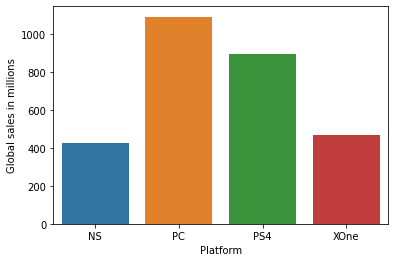

In [221]:
ax = sns.barplot(df_31.index, df_31["Global_Sales"])
ax.set(xlabel='Platform', ylabel='Global sales in millions')

If you would like to see the yearly breakdown, here it is.

In [222]:
df_32=df_3.groupby(["Platform", "Year"])["Global_Sales"].sum()

In [223]:
df_32=df_32.to_frame()
df_32

Global_Sales
Platform Year                
NS       2017.0        213.12
         2018.0        215.30
PC       2013.0        166.15
         2014.0        334.69
         2015.0        193.92
         2016.0        140.01
         2017.0        138.88
         2018.0        119.03
PS4      2013.0         35.09
         2014.0        138.08
         2015.0        180.31
         2016.0        180.08
         2017.0        201.39
         2018.0        160.14
XOne     2013.0         26.23
         2014.0         75.44
         2015.0         96.90
         2016.0         85.76
         2017.0         95.56
         2018.0         87.19

Text(0, 0.5, 'Global sales in millions')

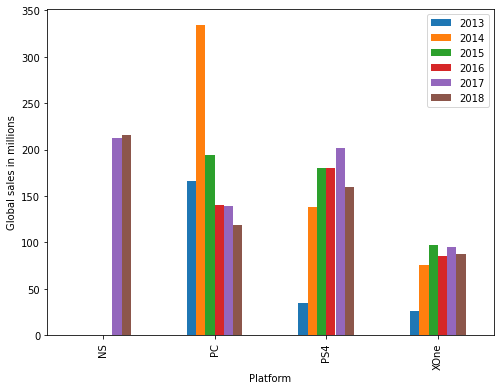

In [224]:
# In 2014, many articles suggest that PC global games sales surpassed consoles
ax1 = df_32.unstack().plot(figsize=(8,6), kind='bar')
ax1.legend(["2013","2014","2015","2016","2017","2018"])
ax1.set_ylabel("Global sales in millions")

At this point, we can see that XOne isn't really doing all the well for this generation. It falls behind PS4 every year. Overall, pc gaming market is very strong. Now let us take a look at the exact market share in term of game sales. Note that we cannot explore the market share with PC, since we didnot take into account the PC sales.

In [225]:
df_33=df_31/df_31["Global_Sales"].sum()
df_33

,Global_Sales
Platform,
NS,0.148588
PC,0.378972
PS4,0.310443
XOne,0.161997


In [226]:
arr = df2[df2['Year']==2018].iloc[:,1:].to_numpy()[0]

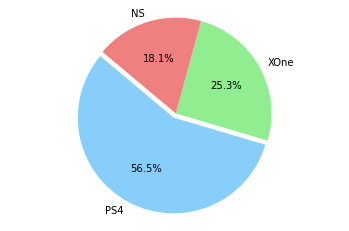

In [227]:
labels = 'PS4', 'XOne', 'NS'
sizes = arr
colors = ['lightskyblue', 'lightgreen', 'lightcoral']
explode = (0.05, 0, 0)  # only "explode" the 1st slice (i.e. 'PS4')

ax21 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

From early observation, PS4 seems to be the better platform to sell newly released games since it has more units sold.

In [228]:
df_33["Global_Sales"]

Platform
NS      0.148588
PC      0.378972
PS4     0.310443
XOne    0.161997
Name: Global_Sales, dtype: float64

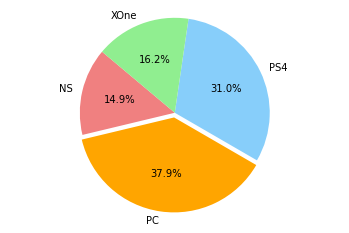

In [229]:
labels = 'NS', 'PC', 'PS4', 'XOne'
sizes = df_33["Global_Sales"]
colors = ['lightcoral', 'orange', 'lightskyblue', 'lightgreen']
explode = (0, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'PC')

ax22 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

PC and PS4 are in the lead of game sales.

In summary, as far as current generation console goes, the winner is clearly the PS4. This will give a lot of confidence to the developers who will continue to make games for PS4 as time goes on, because even when the next generation launches, PS4 will still be supported many years to come. In addition, this will possibly promotes the sales of PS5 since the player base is high, it is very likely for those players to stay with PlayStation due to few main factors, including previous investments in games and friends in the same network, etc. This concludes the analysis on gaming market.

#### Part 2: More visualizations

We can start by finding what kind of game is most popular through the year. For simplicity, we will continue using df_3 which consists of games from 2013 to 2018.

In [230]:
df3.groupby('Genre')['Critic_Score'].mean()

Genre
Action              6.850457
Action-Adventure    7.700000
Adventure           7.359724
Board Game          5.300000
Education           7.500000
Fighting            7.389324
MMO                 7.880270
Misc                6.880158
Music               7.910256
Party               6.050667
Platform            7.329437
Puzzle              7.240032
Racing              7.099340
Role-Playing        7.469725
Sandbox             9.200000
Shooter             7.280148
Simulation          6.939591
Sports              7.290423
Strategy            7.419786
Visual Novel        8.500000
Name: Critic_Score, dtype: float64

In [231]:
df3.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score         0
User_Score       55457
Total_Shipped    53965
Global_Sales         0
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

In [232]:
df_model = df3[["Name", "Platform", "Genre", "Publisher", "Critic_Score", "Global_Sales", "Year"]]

In [233]:
df_model.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.70,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.00,40.24,1985.0
2,Mario Kart Wii,Wii,Racing,Nintendo,8.20,37.14,2008.0
3,PlayerUnknown's Battlegrounds,PC,Shooter,PUBG Corporation,7.28,36.60,2017.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.00,33.09,2009.0


In [234]:
df_model.isnull().sum()

Name              0
Platform          0
Genre             0
Publisher         0
Critic_Score      0
Global_Sales      0
Year            979
dtype: int64

In [235]:
# Save df_model
df_model.to_pickle('visual_dataframe') 

In [236]:
df_model = pd.read_pickle('visual_dataframe')

1. For each platform, find out which genre is most popular.

In [237]:
df_ps4 = df_model[df_model['Platform']=='PS4']
df_ps4_genre = df_ps4.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [238]:
# output_file("bar_charts1.html")

# genres = df_ps4_genre.index.values.tolist()
# sales = df_ps4_genre.values.tolist()

# source = ColumnDataSource(data=dict(genres=genres, sales=sales, color=Category20[5]))

# p = figure(x_range=genres, y_range=[0,300], plot_height=500, title="Top5 genres on PS4",
#            toolbar_location=None, tools="")

# p.vbar(x='genres', top='sales', width=0.75, color='color', legend="genres", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [239]:
df_xone = df_model[df_model['Platform']=='XOne']
df_xone_genre = df_xone.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [240]:
# output_file("bar_charts1.html")

# genres = df_xone_genre.index.values.tolist()
# sales = df_xone_genre.values.tolist()

# source = ColumnDataSource(data=dict(genres=genres, sales=sales, color=Category20[5]))

# p = figure(x_range=genres, y_range=[0,200], plot_height=500, title="Top5 genres on XOne",
#            toolbar_location=None, tools="")

# p.vbar(x='genres', top='sales', width=0.75, color='color', legend="genres", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [241]:
df_ns = df_model[df_model['Platform']=='NS']
df_ns_genre = df_ns.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [242]:
# output_file("bar_charts1.html")

# genres = df_ns_genre.index.values.tolist()
# sales = df_ns_genre.values.tolist()

# source = ColumnDataSource(data=dict(genres=genres, sales=sales, color=Category20[5]))

# p = figure(x_range=genres, y_range=[0,150], plot_height=500, title="Top5 genres on NS",
#            toolbar_location=None, tools="")

# p.vbar(x='genres', top='sales', width=0.75, color='color', legend="genres", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [243]:
df_pc = df_model[df_model['Platform']=='PC']
df_pc_genre = df_pc.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [244]:
# output_file("bar_charts1.html")

# genres = df_pc_genre.index.values.tolist()
# sales = df_pc_genre.values.tolist()

# source = ColumnDataSource(data=dict(genres=genres, sales=sales, color=Category20[5]))

# p = figure(x_range=genres, y_range=[0,900], plot_height=500, title="Top5 genres on PC",
#            toolbar_location=None, tools="")

# p.vbar(x='genres', top='sales', width=0.75, color='color', legend="genres", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

2. For each platform, find out which publisher is most pupular.

In [245]:
df_ps4_publisher = df_ps4.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [246]:
# output_file("bar_charts2.html")

# publishers = df_ps4_publisher.index.values.tolist()
# sales = df_ps4_publisher.values.tolist()

# source = ColumnDataSource(data=dict(publishers=publishers, sales=sales, color=Category20[5]))

# p = figure(x_range=publishers, y_range=[0,150], plot_height=500, title="Top5 publishers on PS4",
#            toolbar_location=None, tools="")

# p.vbar(x='publishers', top='sales', width=0.75, color='color', legend="publishers", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [247]:
df_xone_publisher = df_xone.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [248]:
# output_file("bar_charts2.html")

# publishers = df_xone_publisher.index.values.tolist()
# sales = df_xone_publisher.values.tolist()

# source = ColumnDataSource(data=dict(publishers=publishers, sales=sales, color=Category20[5]))

# p = figure(x_range=publishers, y_range=[0,100], plot_height=500, title="Top5 publishers on XOne",
#            toolbar_location=None, tools="")

# p.vbar(x='publishers', top='sales', width=0.75, color='color', legend="publishers", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [249]:
df_ns_publisher = df_ns.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [250]:
# output_file("bar_charts2.html")

# publishers = df_ns_publisher.index.values.tolist()
# sales = df_ns_publisher.values.tolist()

# source = ColumnDataSource(data=dict(publishers=publishers, sales=sales, color=Category20[5]))

# p = figure(x_range=publishers, y_range=[0,150], plot_height=500, title="Top5 publishers on NS",
#            toolbar_location=None, tools="")

# p.vbar(x='publishers', top='sales', width=0.75, color='color', legend="publishers", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

In [251]:
df_pc_publisher = df_pc.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

In [252]:
# output_file("bar_charts2.html")

# publishers = df_pc_publisher.index.values.tolist()
# sales = df_pc_publisher.values.tolist()

# source = ColumnDataSource(data=dict(publishers=publishers, sales=sales, color=Category20[5]))

# p = figure(x_range=publishers, y_range=[0,1200], plot_height=500, title="Top5 publishers on PC",
#            toolbar_location=None, tools="")

# p.vbar(x='publishers', top='sales', width=0.75, color='color', legend="publishers", source=source)

# p.xgrid.grid_line_color = None
# p.legend.orientation = "vertical"
# p.legend.location = "top_right"

# show(p)

3. Overall top5_genres, top20_games and top5_publishers.

In [253]:
top5_genre=df_model.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_genre

Genre
Shooter     3710.91
Action      3619.11
Misc        3516.49
Platform    2933.69
Sports      2878.70
Name: Global_Sales, dtype: float64

In [254]:
top5_genre=top5_genre.to_frame()
top5_genre_df = df_model[df_model["Genre"].isin(top5_genre.index)]
top5_genre_df.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.70,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.00,40.24,1985.0
3,PlayerUnknown's Battlegrounds,PC,Shooter,PUBG Corporation,7.28,36.60,2017.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.00,33.09,2009.0
6,New Super Mario Bros.,DS,Platform,Nintendo,9.10,30.80,2006.0


In [255]:
top20_name=df_model.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False).head(20)
top20_name

Name
Wii Sports                            82.86
Grand Theft Auto V                    76.89
Minecraft                             67.76
Super Mario Bros.                     41.83
PlayerUnknown's Battlegrounds         39.10
Mario Kart Wii                        37.14
Tetris                                36.44
Wii Sports Resort                     33.09
Call of Duty: Black Ops               32.61
Pokemon Red / Green / Blue Version    31.38
New Super Mario Bros.                 30.80
Call of Duty: Modern Warfare 3        30.71
New Super Mario Bros. Wii             30.22
Call of Duty: Black Ops II            29.59
Call of Duty: Ghosts                  28.80
Duck Hunt                             28.31
Wii Play                              28.02
Call of Duty: Black Ops 3             26.72
Call of Duty: Modern Warfare 2        26.64
Mario Kart DS                         24.14
Name: Global_Sales, dtype: float64

In [256]:
top20_name=top20_name.to_frame()
top20_name.head()

,Global_Sales
Name,
Wii Sports,82.86
Grand Theft Auto V,76.89
Minecraft,67.76
Super Mario Bros.,41.83
PlayerUnknown's Battlegrounds,39.10


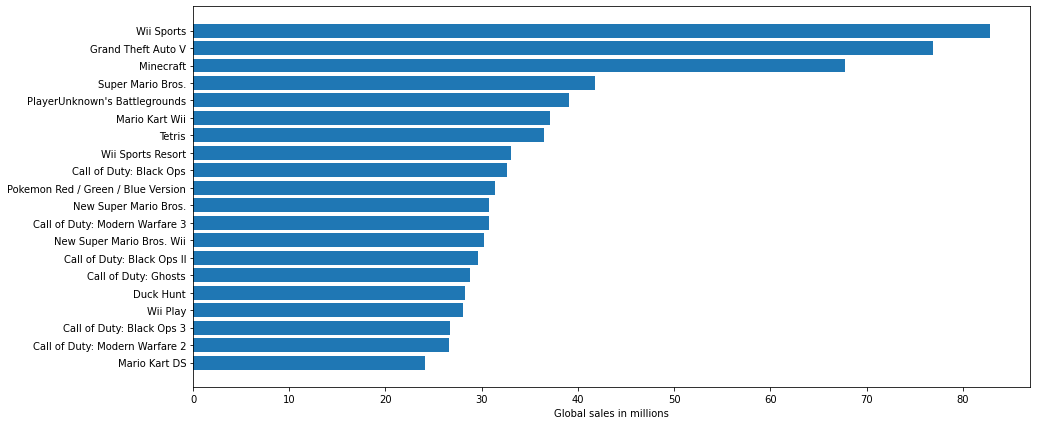

In [257]:
fig, ax3 = plt.subplots(figsize=(15,7))
plt.barh(top20_name.index, top20_name["Global_Sales"], align='center')
plt.xlabel('Global sales in millions')
ax3.invert_yaxis()
plt.show()

In [258]:
top5_publisher=df_model.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top5_publisher

Publisher
Nintendo           2255.49
Unknown            2147.92
Sega               1053.68
Electronic Arts    1000.68
Activision          977.37
Name: Global_Sales, dtype: float64

In [259]:
top5_publisher=top5_publisher.to_frame()
top5_publisher_df = df_model[df_model["Publisher"].isin(top5_publisher.index)]
top5_publisher_df.head()

,Name,Platform,Genre,Publisher,Critic_Score,Global_Sales,Year
0,Wii Sports,Wii,Sports,Nintendo,7.7,82.86,2006.0
1,Super Mario Bros.,NES,Platform,Nintendo,10.0,40.24,1985.0
2,Mario Kart Wii,Wii,Racing,Nintendo,8.2,37.14,2008.0
4,Wii Sports Resort,Wii,Sports,Nintendo,8.0,33.09,2009.0
5,Pokemon Red / Green / Blue Version,GB,Role-Playing,Nintendo,9.4,31.38,1998.0


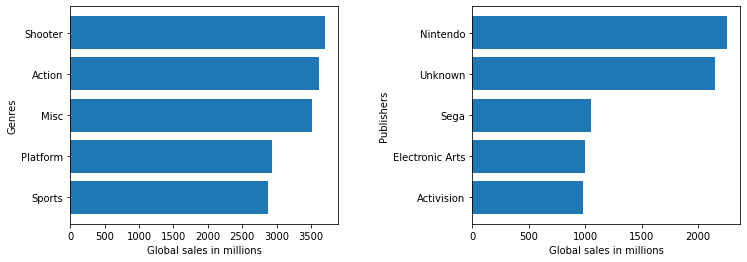

In [260]:
fig, (ax_genre, ax_publisher) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
ax_genre.barh(top5_genre.index, top5_genre['Global_Sales'], align='center')
ax_publisher.barh(top5_publisher.index, top5_publisher['Global_Sales'], align='center')
ax_genre.set_xlabel('Global sales in millions')
ax_genre.set_ylabel('Genres')
ax_publisher.set_xlabel('Global sales in millions')
ax_publisher.set_ylabel('Publishers')
ax_genre.invert_yaxis()
ax_publisher.invert_yaxis()
plt.show()

#### Part 3: Modeling and prediction on future game sales

Now that we know what kind of games are popular, we can proceed building a linear model to predict sales with selected features, namely Genre and Publisher.

In [261]:
mask3 = (df_model["Platform"] == 'PS4') | (df_model["Platform"] == 'XOne') | (df_model["Platform"] == 'NS') | (df_model["Platform"] == 'PC')
df_model1 = df_model.loc[mask3]

In [262]:
df_model1 = df_model1[["Platform", "Genre", "Publisher", "Critic_Score", "Global_Sales"]]
df_model1.head()

,Platform,Genre,Publisher,Critic_Score,Global_Sales
3,PC,Shooter,PUBG Corporation,7.28,36.60
9,PC,Misc,Mojang,10.00,30.01
20,PS4,Action,Rockstar Games,9.70,19.39
22,PC,Misc,Unknown,6.88,18.58
34,PS4,Shooter,Activision,7.28,15.09


In [263]:
df_model1['Platform'].unique()

array(['PC', 'PS4', 'NS', 'XOne'], dtype=object)

In [264]:
df_model1.describe()

,Critic_Score,Global_Sales
count,15001.000000,15001.000000
mean,7.246964,0.458697
std,0.509529,0.806751
min,1.000000,0.000000
25%,6.900000,0.250000
50%,7.290000,0.370000
75%,7.420000,0.550000
max,10.000000,36.600000


In [265]:
X = df_model1[['Platform', 'Genre', 'Publisher', 'Critic_Score']]
y = df_model1['Global_Sales']

In [266]:
categorical_columns = ['Platform', 'Genre', 'Publisher']
numerical_columns = ['Critic_Score']

In [267]:
features = ColumnTransformer([('categorical', OneHotEncoder(), categorical_columns),
                              ('numerical', StandardScaler(), numerical_columns)])

In [268]:
# Main model for interactive webapp
# Linear regression without cross-validation
lr = LinearRegression()
pipe_lr = Pipeline([
    ('features', features),
    ('estimator', lr)
])

pipe_lr.fit(X, y)
y_pred_lr = pipe_lr.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_lr))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_lr))

Mean squared error: 0.44
R2 Score: 0.33


In [269]:
# Next let's try Ridge regression without cross-validation
ridge = Ridge()
pipe_ridge = Pipeline([
    ('features', features),
    ('estimator', ridge)
])

pipe_ridge.fit(X, y)
y_pred_ridge = pipe_ridge.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_ridge))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_ridge))

Mean squared error: 0.46
R2 Score: 0.29


In [270]:
# Ridge regression with cross-validation
X_new = features.fit_transform(X,y)
gs_ridge = GridSearchCV(
                ridge,
                {"alpha": np.arange(40, 50, 0.1)},  # range of hyperparameters to test
                cv=10,  # 10-fold cross validation
                n_jobs=2,  # run each hyperparameter in one of two parallel jobs
)
gs_ridge.fit(X_new, y)
y_pred_ridge_gs = gs_ridge.predict(X_new)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_ridge_gs))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_ridge_gs))

Mean squared error: 0.56
R2 Score: 0.14


In [271]:
gs_ridge.best_params_

{'alpha': 49.90000000000014}

In [272]:
y_pred_ridge_gs

array([1.4868537 , 1.84913242, 2.08829754, ..., 0.34604649, 0.25715676,
       0.77130286])

In [313]:
# RandomForest regression without cross-validation
rf = RandomForestRegressor(n_estimators=100)
pipe_rf = Pipeline([
    ('features', features),
    ('estimator', rf)
])

pipe_rf.fit(X, y)
y_pred_rf = pipe_rf.predict(X)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_rf))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_rf))

Mean squared error: 0.17
R2 Score: 0.75


In [314]:
# Testing model prediction by user input
data = pd.DataFrame([('PS4', 'Shooter', 'Activision', 8.0)], columns = ['Platform' , 'Genre', 'Publisher' , 'Critic_Score'])

In [315]:
data

,Platform,Genre,Publisher,Critic_Score
0,PS4,Shooter,Activision,8.0


In [316]:
# Save predictive_model
pickle.dump(pipe_rf, open('predictive_model.sav', 'wb'))

In [317]:
pipe_rf = pickle.load(open('predictive_model.sav', 'rb'))

In [318]:
# Results in millions
str(pipe_rf.predict(data).tolist()[0])

'10.13786166666665'

In [319]:
str(round(pipe_rf.predict(data).tolist()[0], 2))

'10.14'

In [320]:
# RandomForest regression with cross-validation
X_new = features.fit_transform(X,y)
gs_rf = GridSearchCV(
                rf,
                {"max_depth": [50,60,70,80,90]},  # range of hyperparameters to test
                cv=10,  # 10-fold cross validation
                n_jobs=2,  # run each hyperparameter in one of two parallel jobs
)
gs_rf.fit(X_new, y)
y_pred_rf_gs = gs_rf.predict(X_new)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred_rf_gs))
# The r2 score
print('R2 Score: %.2f'
      % r2_score(y, y_pred_rf_gs))

Mean squared error: 0.16
R2 Score: 0.75


In [281]:
gs_rf.best_params_

{'max_depth': 70}

In [282]:
# Save best_predictive_model
pickle.dump(gs_rf, open('best_predictive_model.sav', 'wb'))

In [283]:
gs_rf = pickle.load(open('best_predictive_model.sav', 'rb'))

From LinearRegression, RidgeRegression to RandomForestRegressor, there is a noticeable improvement in model performance. Since the results from RandomForestRegressor with or without cross-validation are the same, I will simply use the former as my predictive model. Some additional thoughts, instead of using OneHotEncoding, What if I use Label Encoding with respect to certain hiearchy.

In summary, we have successfully predicted game global sales based on platform, genre, publisher and critic_score. As you can see above, the MSE is low as we would prefer. Ideally, top genre games and top publisher games will have bigger sales as well as popular platform games. I'm sure there is room for improvement in the model, this is yet to be explored. For now, this concludes the modeling and predicting.

#### Part 4. Building a game recommender system

Now that we are done with business analytics, let's build a game recommender system for us consumers.

In [284]:
mask2 = (df3["Platform"] == 'PS4') | (df3["Platform"] == 'XOne') | (df3["Platform"] == 'NS') | (df3["Platform"] == 'PC')
df_rec = df3.loc[mask2]

In [285]:
df_rec = df_rec[['Name', 'Platform', 'Genre', 'Publisher', 'Critic_Score', 'Year']]

In [286]:
df_rec.isnull().sum()

Name              0
Platform          0
Genre             0
Publisher         0
Critic_Score      0
Year            663
dtype: int64

In [287]:
df_rec = df_rec.dropna(subset=['Year'])

In [288]:
df_rec['Critic_Score'] = df_rec['Critic_Score'].astype(int)
df_rec['Year'] = df_rec['Year'].astype(int)

In [289]:
df_rec['Critic_Score'] = df_rec['Critic_Score'].astype(str)
df_rec['Year'] = df_rec['Year'].astype(str)

In [290]:
df_rec['Name'] = df_rec['Name'].str.upper() 

In [291]:
# Remove quotations in game names
df_rec['Name'] = df_rec['Name'].str.replace('"','')

In [292]:
df_rec['Joined Column'] = df_rec[['Name', 'Genre', 'Publisher']].apply(lambda x: ', '.join(x), axis = 1)

In [293]:
df_rec.head()

,Name,Platform,Genre,Publisher,Critic_Score,Year,Joined Column
3,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,Shooter,PUBG Corporation,7,2017,"PLAYERUNKNOWN'S BATTLEGROUNDS, Shooter, PUBG C..."
9,MINECRAFT,PC,Misc,Mojang,10,2010,"MINECRAFT, Misc, Mojang"
20,GRAND THEFT AUTO V,PS4,Action,Rockstar Games,9,2014,"GRAND THEFT AUTO V, Action, Rockstar Games"
22,GARRY'S MOD,PC,Misc,Unknown,6,2004,"GARRY'S MOD, Misc, Unknown"
34,CALL OF DUTY: BLACK OPS 3,PS4,Shooter,Activision,7,2015,"CALL OF DUTY: BLACK OPS 3, Shooter, Activision"


In [294]:
# Save df_rec
df_rec.to_pickle('recommender_dataframe') 

In [295]:
df_rec = pd.read_pickle('recommender_dataframe')

In [296]:
# Compute jaccard similarity
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [297]:
# Recommend top 5 games
def get_recommendation(name, platform):
    df_rec1 = df_rec[['Name', 'Platform', 'Joined Column']]
    df_rec_final = df_rec1[df_rec1['Platform'] == platform]
    df_rec_final = df_rec_final[['Name', 'Joined Column']]
    game_desc = df_rec_final.groupby('Name')['Joined Column'].apply(list).to_dict() # Convert dataframe to dictionary
    rec_dict = {}
    for k in game_desc.keys():
        rec_dict[k] = get_jaccard_sim(game_desc[name][0], game_desc[k][0])
    sort_dict = sorted(rec_dict.items(), key=lambda x: x[1], reverse=True)
    return [tp[0] + "," + " sim_score: " + str(round(tp[1],2)) for tp in sort_dict[1:11]]

In [298]:
type(get_recommendation('GRAND THEFT AUTO V', 'PC'))

list

In [299]:
get_recommendation('GRAND THEFT AUTO V', 'PC')

['GRAND THEFT AUTO III, sim_score: 0.75',
 'GRAND THEFT AUTO IV, sim_score: 0.75',
 'GRAND THEFT AUTO 2, sim_score: 0.56',
 'GRAND THEFT AUTO IV: THE COMPLETE EDITION, sim_score: 0.55',
 'GRAND THEFT AUTO: LONDON 1969, sim_score: 0.5',
 'GRAND THEFT AUTO: SAN ANDREAS, sim_score: 0.5',
 'GRAND THEFT AUTO: VICE CITY, sim_score: 0.5',
 'GRAND THEFT AUTO, sim_score: 0.44',
 'GRAND THEFT AUTO: EPISODES FROM LIBERTY CITY, sim_score: 0.42',
 'GRAND THEFT AUTO IV: THE LOST AND DAMNED, sim_score: 0.38']

In [300]:
rec = get_recommendation('GRAND THEFT AUTO V', 'PC')
str_rec = "\n".join(rec)

In [301]:
print(str_rec)

GRAND THEFT AUTO III, sim_score: 0.75
GRAND THEFT AUTO IV, sim_score: 0.75
GRAND THEFT AUTO 2, sim_score: 0.56
GRAND THEFT AUTO IV: THE COMPLETE EDITION, sim_score: 0.55
GRAND THEFT AUTO: LONDON 1969, sim_score: 0.5
GRAND THEFT AUTO: SAN ANDREAS, sim_score: 0.5
GRAND THEFT AUTO: VICE CITY, sim_score: 0.5
GRAND THEFT AUTO, sim_score: 0.44
GRAND THEFT AUTO: EPISODES FROM LIBERTY CITY, sim_score: 0.42
GRAND THEFT AUTO IV: THE LOST AND DAMNED, sim_score: 0.38


#### Part 5. Building a better recommender system

In [2]:
# load df_games
df_games = pd.read_pickle('games_dataframe')

In [3]:
df_games['name'] = df_games['name'].str.upper()

In [4]:
df_games['summary'] = df_games['summary'].str.upper()

In [5]:
df_games['summary'] = df_games['summary'].str.replace(r'[^a-zA-Z]',' ')

In [6]:
# platform 48 is ps4
df_ps4 = df_games[df_games['platforms'].str.contains("48")]
df_ps4['platforms'] = 'PS4'
df_ps4.head()

,id,name,platforms,summary
14,76845,VESTA,PS4,SET IN A HIGHLY TECHNOLOGICAL UNIVERSE WITH V...
18,17232,COMA:MORTUARY,PS4,THE STORY IS ABOUT A GUY WHO HAS LOST MEANING ...
20,119218,ARCADE ARCHIVES ALPINE SKI,PS4,ALPINE SKI IS AN ARCADE SPORTS GAME RELEASED B...
22,55038,IMMORTAL: UNCHAINED,PS4,IMMORTAL UNCHAINED IS A SOULS INSPIRED THIRD ...
23,41058,THE SEVEN DEADLY SINS: KNIGHTS OF BRITANNIA,PS4,BASED ON THE POPULAR MANGA AND ANIME SERIES TH...


In [7]:
# plaform 49 is xone
df_xone = df_games[df_games['platforms'].str.contains("49")]
df_xone['platforms'] = 'XONE'
df_xone.head()

,id,name,platforms,summary
11,111226,LOST ARTIFACTS: TIME MACHINE,XONE,LOST ARTIFACTS TIME MACHINE IS AN EXCITING ST...
22,55038,IMMORTAL: UNCHAINED,XONE,IMMORTAL UNCHAINED IS A SOULS INSPIRED THIRD ...
25,111576,ZEROPTIAN INVASION,XONE,ZEROPTIAN INVASION IS A CLASSIC SHUMP WITH MEC...
28,75868,FARMING SIMULATOR 17: PLATINUM EDITION,XONE,TAKE ON THE ROLE OF A MODERN FARMER IN FARMING...
46,28061,OVERWATCH - COLLECTOR'S EDITION,XONE,THE OVERWATCH COLLECTOR S EDITION IS PACKED FU...


In [8]:
# platform 130 is ns
df_ns = df_games[df_games['platforms'].str.contains("130")]
df_ns['platforms'] = 'NS'
df_ns.head()

,id,name,platforms,summary
10,86241,MAD CARNAGE,NS,IN THE WORLD AFTER THE GREAT WAR YOU WILL TAK...
14,76845,VESTA,NS,SET IN A HIGHLY TECHNOLOGICAL UNIVERSE WITH V...
16,5145,SECRET FILES: TUNGUSKA,NS,UNRAVEL ONE OF THE GREATEST MYSTERIES OF OUR T...
20,119218,ARCADE ARCHIVES ALPINE SKI,NS,ALPINE SKI IS AN ARCADE SPORTS GAME RELEASED B...
50,26545,COMBAT CORE,NS,COMBAT CORE IS A D ARENA FIGHTING GAME SPORTI...


In [9]:
# platform 6 is pc
df_pc = df_games[df_games['platforms'].str.contains("6")]
df_pc['platforms'] = 'PC'
df_pc.head()

,id,name,platforms,summary
0,34116,LEMURZIN,PC,LEMURZIN IS A UNIQUE CRAZY RUNNER GAME PLAY F...
1,74857,TRANSCEND,PC,A PUZZLE PLATFORMER IN WHICH YOU TRANSCEND LIF...
2,52269,ALL HAZE EVE,PC,A D ADVENTURE GAME WHERE YOU RE FOLLOWING A M...
3,138149,JUNIOR ARITHMANCER,PC,A ONE TO MANY ROOM PUZZLER
5,68841,CAPTIVUS,PC,JOIN THE MOVEMENT BUILD A DECK EQUIP YOUR SH...


In [10]:
df_ps4.size + df_xone.size + df_ns.size + df_pc.size

201756

In [11]:
df_merge = df_ps4.append(df_xone).append(df_ns).append(df_pc)

In [12]:
df_merge

,id,name,platforms,summary
14,76845,VESTA,PS4,SET IN A HIGHLY TECHNOLOGICAL UNIVERSE WITH V...
18,17232,COMA:MORTUARY,PS4,THE STORY IS ABOUT A GUY WHO HAS LOST MEANING ...
20,119218,ARCADE ARCHIVES ALPINE SKI,PS4,ALPINE SKI IS AN ARCADE SPORTS GAME RELEASED B...
22,55038,IMMORTAL: UNCHAINED,PS4,IMMORTAL UNCHAINED IS A SOULS INSPIRED THIRD ...
23,41058,THE SEVEN DEADLY SINS: KNIGHTS OF BRITANNIA,PS4,BASED ON THE POPULAR MANGA AND ANIME SERIES TH...
...,...,...,...,...
40847,10989,THREE FOURTHS HOME,PC,IN HER MID S KELLY HAS BEEN FORCED TO MOVE...
40848,21024,DMC: DEVIL MAY CRY - VERGIL'S DOWNFALL,PC,ASIDE FROM PLAYING AS VERGIL THROUGHOUT THE CO...
40849,139748,SURFACE: THE PANTHEON,PC,IT SHOULD HAVE BEEN A TREMENDOUS ACHIEVEMENT ...
40850,2971,LINEAGE 2,PC,LINEAGE II IS A MASSIVE MULTIPLAYER ONLINE ROL...


In [13]:
df_merge.head()

,id,name,platforms,summary
14,76845,VESTA,PS4,SET IN A HIGHLY TECHNOLOGICAL UNIVERSE WITH V...
18,17232,COMA:MORTUARY,PS4,THE STORY IS ABOUT A GUY WHO HAS LOST MEANING ...
20,119218,ARCADE ARCHIVES ALPINE SKI,PS4,ALPINE SKI IS AN ARCADE SPORTS GAME RELEASED B...
22,55038,IMMORTAL: UNCHAINED,PS4,IMMORTAL UNCHAINED IS A SOULS INSPIRED THIRD ...
23,41058,THE SEVEN DEADLY SINS: KNIGHTS OF BRITANNIA,PS4,BASED ON THE POPULAR MANGA AND ANIME SERIES TH...


In [14]:
# Save df_merge
df_merge.to_pickle('total_games_dataframe') 

In [157]:
df_merge = pd.read_pickle('total_games_dataframe')

In [158]:
df_merge['platforms'].unique()

array(['PS4', 'XONE', 'NS', 'PC'], dtype=object)

In [159]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(2,2))

In [160]:
tfidf_dict = {}
for platform in df_merge['platforms'].unique():
    tfidf_dict[platform]= tfidf.fit_transform(df_merge[df_merge['platforms']==platform].reset_index(drop=True)['summary'])

In [161]:
# save tfidf_dict
pickle.dump(tfidf_dict, open("tfidf_dict.d", "wb"))

In [162]:
tfidf_dict = pickle.load(open("tfidf_dict.d", "rb"))

In [163]:
tfidf_dict.keys()

dict_keys(['PS4', 'XONE', 'NS', 'PC'])

In [164]:
tfidf_dict['PS4'].shape

(5010, 156989)

In [165]:
tfidf_sim = {}
for key in tfidf_dict.keys():
    tfidf_sim[key] = cosine_similarity(tfidf_dict[key])

In [35]:
# # save tfidf_sim
# pickle.dump(tfidf_sim, open("tfidf_sim.m", "wb"))

In [36]:
# tfidf_sim = pickle.load(open("tfidf_sim.m", "rb"))

In [166]:
indices = pd.Series(df_merge[df_merge['platforms']=='PS4'].reset_index(drop=True).index, index=df_merge[df_merge['platforms']=='PS4'].reset_index(drop=True)['name']).drop_duplicates()

In [167]:
df_test = df_merge[df_merge['platforms']=='PS4'].reset_index(drop=True)

In [168]:
df_test.index

RangeIndex(start=0, stop=5010, step=1)

In [169]:
idx = indices['GRAND THEFT AUTO V']

In [170]:
idx

3930

In [171]:
sim_scores = list(enumerate(tfidf_sim['PS4'][idx]))

In [172]:
sim_scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.011157413337774265),
 (29, 0.014426287077627485),
 (30, 0.0),
 (31, 0.0),
 (32, 0.01307410796286024),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.008493663450299302),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0

In [334]:
def get_recommendations(name, platform):
    
    try:
        #Construct a reverse map of indices and game names
        indices = pd.Series(df_merge[df_merge['platforms']==platform.upper()].reset_index(drop=True).index, index=df_merge[df_merge['platforms']==platform.upper()].reset_index(drop=True)['name']).drop_duplicates()

        # Get the index of the game that matches the game name
        idx = indices[name.upper()]

        # Get the pairwsie similarity scores of all games with that game
        sim_scores = list(enumerate(tfidf_sim[platform.upper()][idx]))

        # Sort the games based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the 10 most similar games
        sim_scores = sim_scores[1:11]

        # Get the game indices
        game_indices = [i[0] for i in sim_scores]
        
        # Get game titles and sim_scores
        df_merge_test = pd.DataFrame(df_merge[df_merge['platforms']==platform.upper()].reset_index(drop=True)['name'].iloc[game_indices])
        df_merge_test['cos_sim'] = [round(i[1],2) for i in sim_scores]
        
        # Print dataframe without index shown
        print(df_merge_test[['name', 'cos_sim']].to_string(index=False))

    except:
        print(f'Game does not exist on {platform.upper()}')

In [341]:
get_recommendations('call of duty: black ops iii', 'ps4')

                                                     name  cos_sim
 CALL OF DUTY: BLACK OPS III - ZOMBIES CHRONICLES EDITION     0.56
               CALL OF DUTY: BLACK OPS III - GOLD EDITION     0.28
     CALL OF DUTY: BLACK OPS III - DIGITAL DELUXE EDITION     0.26
          CALL OF DUTY: BLACK OPS III - JUGGERNOG EDITION     0.14
                         CALL OF DUTY: BLACK OPS COLD WAR     0.14
                                CALL OF DUTY: BLACK OPS 4     0.13
                    CALL OF DUTY: BLACK OPS III - DESCENT     0.12
          CALL OF DUTY: BLACK OPS III - STEELBOOK EDITION     0.09
      CALL OF DUTY: INFINITE WARFARE - LEGACY PRO EDITION     0.07
                  CALL OF DUTY: BLACK OPS III - SALVATION     0.06
